In [1]:

# Turn off Pretty Print, enable inline plotting with Matplotlib, add py folder to system path, import jobpostlib modules
%pprint
%matplotlib inline
import sys
if (osp.join('..', 'py') not in sys.path): 
    sys.path.insert(1, osp.join('..', 'py'))
from jobpostlib import (
    crf, cu, datetime, duration, hau, hc, humanize, ihu, lru, nu, osp, 
    scrfcu, slrcu, ssgdcu, su, t0, time, wsu, speech_engine
)
from pandas import DataFrame
from tqdm import tqdm

Pretty printing has been turned OFF
======== Neo4j/4.4.7 ========
Utility libraries created in 7 seconds


In [2]:

# Check if the lru has built its is-qualified classifier
t1 = time.time()
if not (hasattr(lru, 'ISQUALIFIED_LR') and hasattr(lru, 'ISQUALIFIED_CV')):
    lru.build_isqualified_logistic_regression_elements(sampling_strategy_limit=None, verbose=True)
duration_str = humanize.precisedelta(time.time() - t1, minimum_unit='seconds', format='%0.0f')
speech_str = f'Is-qualified LR elements built in {duration_str}'; print(speech_str)

I have 532,546 is-qualified vocabulary tokens in here
Is-qualified LR elements built in 5 seconds



---
# Training

In [3]:

# You need to run this again if you changed the qualification dictionary below or in another notebook
t1 = time.time()

# Keep the total retraining time to less than two minutes by adjusting the sampling strategy limit
lru.sync_basic_quals_dict(sampling_strategy_limit=None, verbose=False)

lru.retrain_isqualified_classifier(verbose=True)
duration_str = humanize.precisedelta(time.time() - t1, minimum_unit='seconds', format='%0.0f')
speech_str = f'Is-qualified classifer retrained in {duration_str}'; print(speech_str)

I have 19,430 hand-labeled qualification strings in here
I have 543,710 is-qualified vocabulary tokens in here
Is-qualified classifer retrained in 9 seconds


In [4]:

[f'lru.{fn}' for fn in dir(lru) if not fn.startswith('_')]

['lru.ISQUALIFIED_CV', 'lru.ISQUALIFIED_LR', 'lru.ISQUALIFIED_TT', 'lru.ISQUALIFIED_VOCAB', 'lru.basic_quals_df', 'lru.basic_quals_dict', 'lru.build_isqualified_logistic_regression_elements', 'lru.build_isqualified_lr_predict_percent', 'lru.display_hunting_dataframe_as_histogram', 'lru.get_isqualified_tfidf_matrix', 'lru.get_quals_str', 'lru.get_to_be_trained_quals', 'lru.hunting_df', 'lru.infer_from_hunting_dataframe', 'lru.navigable_parent_cypher_str', 'lru.predict_isqualified', 'lru.predict_job_hunt_percent_fit', 'lru.print_loc_computation', 'lru.qual_sum', 'lru.rebalance_data', 'lru.refit_isqualified_lr', 'lru.retrain_isqualified_classifier', 'lru.sampling_strategy_limit', 'lru.sync_basic_quals_dict', 'lru.update_hunting', 'lru.verbose']

In [5]:

[f'lru.{fn}' for fn in dir(lru.ISQUALIFIED_CV) if not fn.startswith('_')]

['lru.analyzer', 'lru.binary', 'lru.build_analyzer', 'lru.build_preprocessor', 'lru.build_tokenizer', 'lru.decode', 'lru.decode_error', 'lru.dtype', 'lru.encoding', 'lru.fit', 'lru.fit_transform', 'lru.fixed_vocabulary_', 'lru.get_feature_names', 'lru.get_feature_names_out', 'lru.get_params', 'lru.get_stop_words', 'lru.input', 'lru.inverse_transform', 'lru.lowercase', 'lru.max_df', 'lru.max_features', 'lru.min_df', 'lru.ngram_range', 'lru.preprocessor', 'lru.set_params', 'lru.stop_words', 'lru.stop_words_', 'lru.strip_accents', 'lru.token_pattern', 'lru.tokenizer', 'lru.transform', 'lru.vocabulary', 'lru.vocabulary_']

In [6]:

[f'lru.ISQUALIFIED_LR.{fn}' for fn in dir(lru.ISQUALIFIED_LR) if not fn.startswith('_')]

['lru.ISQUALIFIED_LR.C', 'lru.ISQUALIFIED_LR.class_weight', 'lru.ISQUALIFIED_LR.classes_', 'lru.ISQUALIFIED_LR.coef_', 'lru.ISQUALIFIED_LR.decision_function', 'lru.ISQUALIFIED_LR.densify', 'lru.ISQUALIFIED_LR.dual', 'lru.ISQUALIFIED_LR.fit', 'lru.ISQUALIFIED_LR.fit_intercept', 'lru.ISQUALIFIED_LR.get_params', 'lru.ISQUALIFIED_LR.intercept_', 'lru.ISQUALIFIED_LR.intercept_scaling', 'lru.ISQUALIFIED_LR.l1_ratio', 'lru.ISQUALIFIED_LR.max_iter', 'lru.ISQUALIFIED_LR.multi_class', 'lru.ISQUALIFIED_LR.n_features_in_', 'lru.ISQUALIFIED_LR.n_iter_', 'lru.ISQUALIFIED_LR.n_jobs', 'lru.ISQUALIFIED_LR.penalty', 'lru.ISQUALIFIED_LR.predict', 'lru.ISQUALIFIED_LR.predict_log_proba', 'lru.ISQUALIFIED_LR.predict_proba', 'lru.ISQUALIFIED_LR.random_state', 'lru.ISQUALIFIED_LR.score', 'lru.ISQUALIFIED_LR.set_params', 'lru.ISQUALIFIED_LR.solver', 'lru.ISQUALIFIED_LR.sparsify', 'lru.ISQUALIFIED_LR.tol', 'lru.ISQUALIFIED_LR.verbose', 'lru.ISQUALIFIED_LR.warm_start']

In [7]:

[f'lru.ISQUALIFIED_TT.{fn}' for fn in dir(lru.ISQUALIFIED_TT) if not fn.startswith('_')]

['lru.ISQUALIFIED_TT.fit', 'lru.ISQUALIFIED_TT.fit_transform', 'lru.ISQUALIFIED_TT.get_feature_names_out', 'lru.ISQUALIFIED_TT.get_params', 'lru.ISQUALIFIED_TT.idf_', 'lru.ISQUALIFIED_TT.n_features_in_', 'lru.ISQUALIFIED_TT.norm', 'lru.ISQUALIFIED_TT.set_params', 'lru.ISQUALIFIED_TT.smooth_idf', 'lru.ISQUALIFIED_TT.sublinear_tf', 'lru.ISQUALIFIED_TT.transform', 'lru.ISQUALIFIED_TT.use_idf']


----
## Let's use our labeled data to evaluate a Logistic Regression model

In [9]:

sent_str = 'Experience using a procedural programming language like Python to manipulate, clean, and analyze data.'
lru.predict_isqualified(sent_str)[0]

True

In [18]:

print(lru.basic_quals_df.shape)
df = lru.basic_quals_df.sample(5)
quals_list = df.qualification_str.tolist()
display(quals_list)
is_qualifieds_list = df.is_qualified.tolist()
display(is_qualifieds_list)

(19430, 2)


['Master’s or Doctor of Philosophy degree in Computer Science, Applied Math, Statistics, or a scientific field', 'Excellent analytical &amp; troubleshooting skills.', 'Plans and Aligns', 'Experience with running software in a Linux environment.', 'Proven ability to effectively communicate, both orally and in writing, to executive leadership.']

[1, 1, 1, 1, 0]

In [ ]:

display(lru.predict_job_hunt_percent_fit(quals_list).shape)
print(lru.ISQUALIFIED_LR.classes_)

(19430, 2)


['Energetic and positive contributor who can fit into a highly motivated and high performance team.', 'Familiarity with digital signal processing techniques (FFT, Filters, etc) a plus', 'HFDS: 1 year (Required)', 'Advanced programming skills in Python and SQL.', 'Data Visualization (Tableau, PowerBI - An advantage)']

[1, 0, 0, 1, 0]

(5, 2)

[0 1]


In [13]:

df = lru.basic_quals_df.sample(1_000)
qual_strs_list = df.qualification_str.tolist()
actuals_list = df.is_qualified.tolist()
y_predict_proba = lru.predict_job_hunt_percent_fit(qual_strs_list)
rows_list = []
for qual_str, actual, probs in zip(qual_strs_list, actuals_list, y_predict_proba):
    row_dict = {'qual_str': qual_str, 'actual': actual}
    for i in range(probs.shape[0]):
        row_dict[f'class{i}_prob'] = probs[i]
    row_dict['predict_isqualified'] = lru.predict_isqualified(qual_str)[0]
    rows_list.append(row_dict)
probabilities_df = DataFrame(rows_list)

,qual_str,actual,class0_prob,class1_prob,predict_isqualified
969,Experience with version control and code hosti...,1,4.520154e-08,1.000000e+00,True
935,It is required that you will have familiarity ...,1,6.062300e-05,9.999394e-01,True
501,Familiar with and take agile approach in the p...,1,9.963643e-01,3.635716e-03,False
296,Overview: To be successful in this role you wi...,1,0.000000e+00,1.000000e+00,True
87,"Possessing a Certification in UIPath, Blue Pri...",0,1.000000e+00,6.866125e-13,False
6,2+ years of front end and back end programming...,1,5.652252e-07,9.999994e-01,True
691,Diverse skill set: someone that can do automat...,0,7.836500e-01,2.163500e-01,False
363,Advanced proficiency with Python framework and...,1,3.108624e-15,1.000000e+00,True
159,Citizenship & Citizenship Verification: This p...,1,4.253018e-05,9.999575e-01,True
26,Experience using Jupyter notebooks or similar ...,1,5.925385e-04,9.994075e-01,True


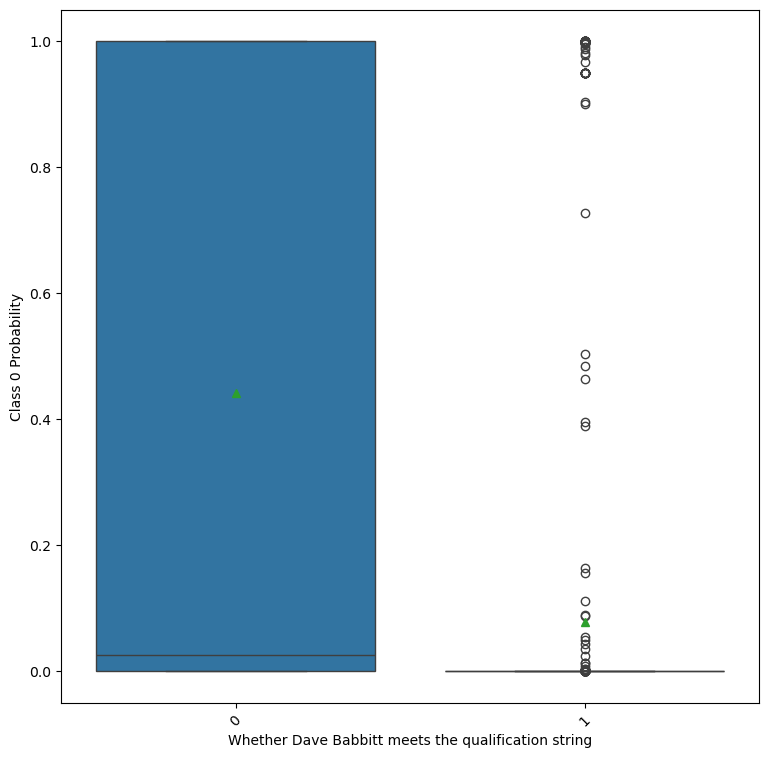

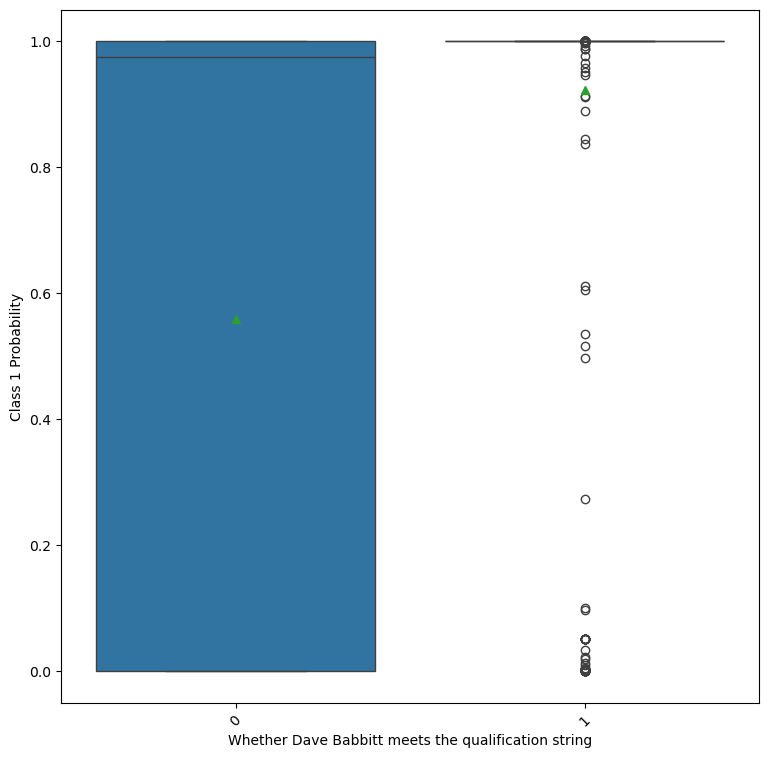

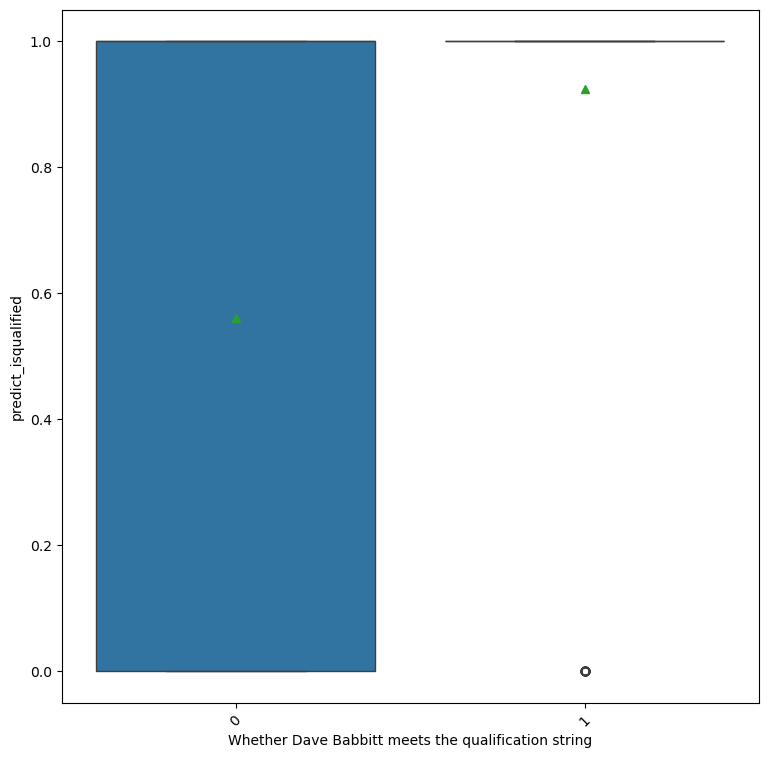

In [15]:

df = probabilities_df.sample(10)
display(df)
nu.plot_grouped_box_and_whiskers(
        probabilities_df,
        'actual',
        'class0_prob',
        'Whether Dave Babbitt meets the qualification string',
        'Class 0 Probability',
        transformer_name=None,
        is_y_temporal=False
    )
nu.plot_grouped_box_and_whiskers(
        probabilities_df,
        'actual',
        'class1_prob',
        'Whether Dave Babbitt meets the qualification string',
        'Class 1 Probability',
        transformer_name=None,
        is_y_temporal=False
    )
nu.plot_grouped_box_and_whiskers(
        probabilities_df,
        'actual',
        'predict_isqualified',
        'Whether Dave Babbitt meets the qualification string',
        'predict_isqualified',
        transformer_name=None,
        is_y_temporal=False
    )

In [11]:

lru.basic_quals_df.is_qualified.value_counts()

is_qualified
1    11912
0     7518
Name: count, dtype: int64

In [13]:

lru.predict_isqualified??

Signature: lru.predict_isqualified(child_str)
Docstring: <no docstring>
Source:   
    def predict_isqualified(self, child_str):
        if not isinstance(child_str, list): child_str = list(child_str)
        probs_list = self.predict_job_hunt_percent_fit(child_str)
        idx = probs_list.index(max(probs_list))
        is_qualified = [True, False][idx]
        
        return is_qualified
File:      c:\users\daveb\onedrive\documents\github\job-hunting\py\jobpostlib\lr_utils.py
Type:      method

In [16]:

lru.ISQUALIFIED_LR.predict_proba??

Signature: lru.ISQUALIFIED_LR.predict_proba(X)
Source:   
    def predict_proba(self, X):
        """
        Probability estimates.

        The returned estimates for all classes are ordered by the
        label of classes.

        For a multi_class problem, if multi_class is set to be "multinomial"
        the softmax function is used to find the predicted probability of
        each class.
        Else use a one-vs-rest approach, i.e calculate the probability
        of each class assuming it to be positive using the logistic function.
        and normalize these values across all the classes.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Vector to be scored, where `n_samples` is the number of samples and
            `n_features` is the number of features.

        Returns
        -------
        T : array-like of shape (n_samples, n_classes)
            Returns the probability of the sample for each class in the model,


In [6]:

import random

print('\nCV')
print(lru.CV)
print('\nLR_DICT')
for k, v in random.sample(lru.LR_DICT.items(), 2):
    print(k, v)
print('\nPREDICT_PERCENT_FIT_DICT')
for k, v in random.sample(lru.PREDICT_PERCENT_FIT_DICT.items(), 2):
    print(k, v)
print('\nTT')
print(lru.TT)


CV
CountVectorizer(lowercase=False, min_df=0.0, ngram_range=(1, 5),
                strip_accents='ascii',
                tokenizer=<bound method HeaderAnalysis.html_regex_tokenizer of <__main__.HeaderAnalysis object at 0x00000217DBAACDC8>>)

LR_DICT
O-RQ LogisticRegression(C=375.0, class_weight='balanced', max_iter=1000,
                   penalty='l1', solver='liblinear', verbose=False)
H-SP LogisticRegression(C=375.0, class_weight='balanced', max_iter=1000,
                   penalty='l1', solver='liblinear', verbose=False)

PREDICT_PERCENT_FIT_DICT
O-TS <function LrUtilities.build_lr_predict_percent.<locals>.predict_percent_fit at 0x00000217E229B708>
H-O <function LrUtilities.build_lr_predict_percent.<locals>.predict_percent_fit at 0x00000217E229B048>

TT
TfidfTransformer(norm='l1')



## Test its accuracy

In [26]:

sql_str = f'''
    SELECT
        np.[navigable_parent],
        pos.[pos_symbol]
    FROM
        [Jobhunting].[dbo].[NavigableParents] np INNER JOIN
        [Jobhunting].[dbo].[PartsOfSpeech] pos ON
            pos.[is_header] = np.[is_header] AND
            pos.[is_task_scope] = np.[is_task_scope] AND
            pos.[is_minimum_qualification] = np.[is_minimum_qualification] AND
            pos.[is_preferred_qualification] = np.[is_preferred_qualification] AND
            pos.[is_legal_notification] = np.[is_legal_notification] AND
            pos.[is_job_title] = np.[is_job_title] AND
            pos.[is_office_location] = np.[is_office_location] AND
            pos.[is_job_duration] = np.[is_job_duration] AND
            pos.[is_supplemental_pay] = np.[is_supplemental_pay] AND
            pos.[is_educational_requirement] = np.[is_educational_requirement] AND
            pos.[is_interview_procedure] = np.[is_interview_procedure] AND
            pos.[is_corporate_scope] = np.[is_corporate_scope] AND
            pos.[is_posting_date] = np.[is_posting_date] AND
            pos.[is_other] = np.[is_other];'''
pos_df = pd.DataFrame(lru.su.get_execution_results(lru.cursor, sql_str, verbose=False))
POS_DICT = pos_df.set_index('navigable_parent')['pos_symbol'].to_dict()

In [36]:

y_true = []
y_pred = []
for sent_str, pos_symbol in POS_DICT.items():
    y_true.append(pos_symbol)
    y_pred.append(lru.lr_predict_single(sent_str))

In [38]:

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        H-CS       1.00      0.10      0.17        21
        H-ER       0.00      0.00      0.00         4
        H-IP       0.00      0.00      0.00         3
        H-JD       0.00      0.00      0.00         8
        H-JT       0.00      0.00      0.00         3
        H-LN       0.00      0.00      0.00         8
         H-O       0.00      0.00      0.00         4
        H-OL       1.00      0.05      0.10        20
        H-PD       0.00      0.00      0.00         2
        H-PQ       0.00      0.00      0.00        20
        H-RQ       0.71      0.08      0.15        61
        H-SP       0.00      0.00      0.00         9
        H-TS       0.98      0.60      0.74        67
        O-CS       0.52      0.92      0.67        13
        O-ER       0.75      0.50      0.60         6
        O-IP       0.43      0.60      0.50         5
        O-LN       0.27      1.00      0.42         8
         O-O       0.00    

C:\Users\dev\Documents\Repositories\job-hunting\jh\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:

seen = set()
seen_add = seen.add
label_list = [x for x in y_true if not (x in seen or seen_add(x))]

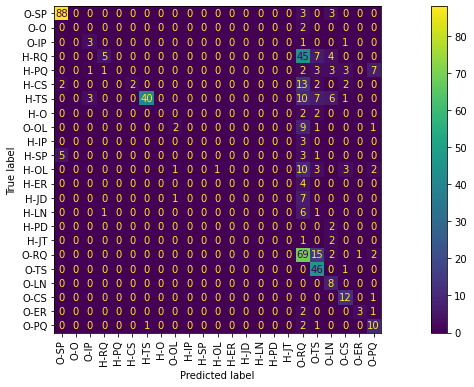

In [62]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=label_list)
fig, ax = plt.subplots(figsize=(18, 6))
cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax)
xticklabels_list = ax.set_xticklabels(label_list, rotation='vertical')
yticklabels_list = ax.set_yticklabels(label_list)